Tony Tong. For Harvard Ph12b 2017. 

In [5]:
# walker.py (Python 3.4)
# Jesse M. Kinder -- 2014 Nov 16
""" Make a movie out of the steps of a two-dimensional random walk. """
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import random as rand

# Set number of steps for each random walk.
num_steps = 100

# Create an empty figure of the desired size.
bound = 20
fig = plt.figure() 		# must have figure object for movie
ax = plt.axes(xlim=(-bound, bound), ylim=(-bound, bound))

# Create a line and a point with no data.  They will be updated during each
# frame of the animation.
(my_line,) = ax.plot([], [], lw=2)				# line to show path
(my_point,) = ax.plot([], [], 'ro', ms=9)		# dot to show current position

# Generate the random walk data.
x_steps = 2*(rand(num_steps) < 0.5) - 1		# generate random steps +/- 1
y_steps = 2*(rand(num_steps) < 0.5) - 1
x_coordinate = x_steps.cumsum()				# sum steps to get position
y_coordinate = y_steps.cumsum()

# This function will generate each frame of the animation.
# It adds all of the data through frame n to a line
# and moves a point to the nth position of the walk.
def get_step(n, x, y, this_line, this_point):
	this_line.set_data(x[:n+1], y[:n+1])
	this_point.set_data(x[n], y[n])

# Call the animator and create the movie.
my_movie = animation.FuncAnimation(fig, get_step, frames=num_steps, \
					fargs=(x_coordinate,y_coordinate,my_line,my_point) )

# Save the movie in the current directory.
# *** THIS WILL CAUSE AN ERROR UNLESS FFMPEG OR MENCODER IS INSTALLED. ***
# my_movie.save('random_walk.mp4', fps=30)


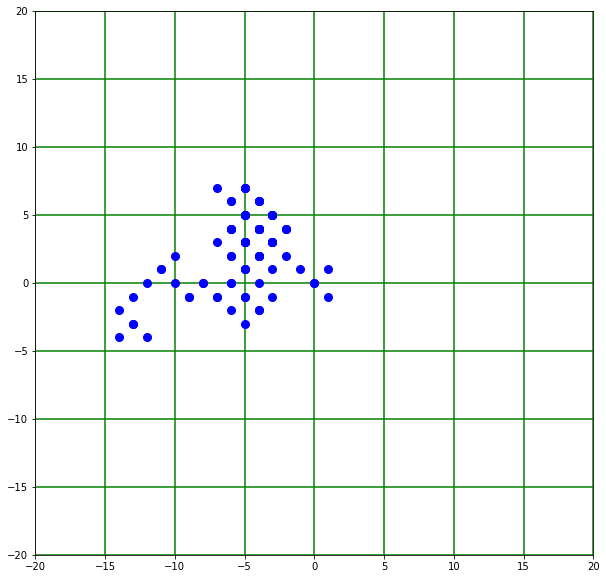

In [12]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(x_coordinate, y_coordinate, 'b.', ms=16)
plt.axis([-20,20,-20,20])
plt.grid(b=True,which='major',ls='-',lw=1.5,c='g')
#plt.xlabel('$\\Delta x$ [$\\mu$m]', fontsize=24)
#plt.ylabel('$\\Delta y$ [$\\mu$m]', fontsize=24)
ax=plt.gca()
#ax.set_xticklabels(ax.get_xticks(), weight='bold', fontsize=16)
#ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize=16)
plt.show()